<a href="https://colab.research.google.com/github/Sinandah/Sinandah/blob/main/nlp_twitter_airline_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset from Kaggle
!pip install -q kaggle
from google.colab import files

# Upload your Kaggle API key file (kaggle.json) obtained from your Kaggle account settings
files.upload()

# Move the uploaded Kaggle API key file to the required directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using Kaggle API
!kaggle datasets download -d crowdflower/twitter-airline-sentiment

# Unzip the downloaded file
!unzip twitter-airline-sentiment.zip

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Tweets.csv')

# Display the first few rows of the dataset
df.head()



Saving kaggle.json to kaggle.json
 78% 2.00M/2.55M [00:01<00:00, 1.49MB/s]
100% 2.55M/2.55M [00:01<00:00, 1.58MB/s]
Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
#sentiment classification LSTM model
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Select relevant columns
df = df[['text', 'airline_sentiment']]

# Encode sentiment labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['airline_sentiment'])

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'].values, df['label'].values, test_size=0.2, random_state=42
)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data)
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=16, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_padded, train_labels,
    epochs=20,
    validation_data=(test_padded, test_labels),
    callbacks=[early_stopping]
)

# Train the model
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))


Epoch 1/20
366/366 [==============================] - 20s 46ms/step - loss: 0.6906 - accuracy: 0.2151 - val_loss: 0.6929 - val_accuracy: 0.1981
Epoch 2/20
366/366 [==============================] - 5s 14ms/step - loss: 0.6903 - accuracy: 0.2151 - val_loss: 0.6932 - val_accuracy: 0.1981
Epoch 3/20
366/366 [==============================] - 5s 12ms/step - loss: 0.6904 - accuracy: 0.2151 - val_loss: 0.6961 - val_accuracy: 0.1981
Epoch 4/20
366/366 [==============================] - 5s 14ms/step - loss: 0.6904 - accuracy: 0.2151 - val_loss: 0.6946 - val_accuracy: 0.1981
Epoch 1/10
366/366 [==============================] - 4s 10ms/step - loss: 0.6907 - accuracy: 0.2151 - val_loss: 0.6935 - val_accuracy: 0.1981
Epoch 2/10
366/366 [==============================] - 5s 13ms/step - loss: 0.6904 - accuracy: 0.2151 - val_loss: 0.6950 - val_accuracy: 0.1981
Epoch 3/10
366/366 [==============================] - 4s 11ms/step - loss: 0.6903 - accuracy: 0.2151 - val_loss: 0.6939 - val_accuracy: 0.198

92/92 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.1981
Test Loss: 0.6943289041519165, Test Accuracy: 0.1980874389410019


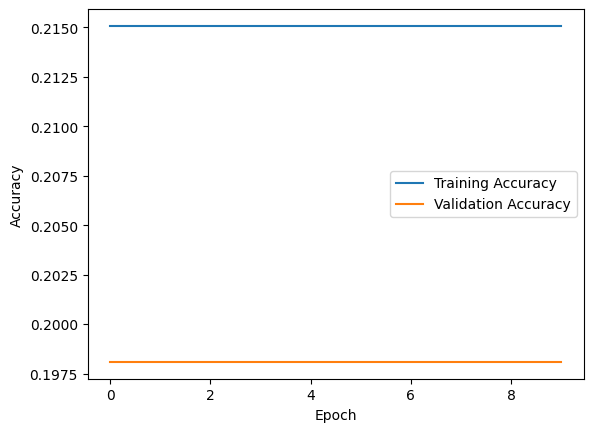

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(test_padded, test_labels)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:
#Bidirectional LSTM
#considers information from both past and future contexts
#improves the models ability to capture dependencies in the text
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=16, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))


In [16]:

# Save the model
model.save('sentiment_analysis_model.h5')

# Load the model
loaded_model = ('sentiment_analysis_model.h5')


In [17]:
pip install Flask


In [ ]:
from flask import Flask, render_template, request
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

app = Flask(__name__)

# Load the trained model
model = load_model('sentiment_analysis_model.h5')

# Load the tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts([""])

# Render the home page
@app.route('/')
def home():
    return render_template('index.html')

# Handle the form submission
@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        text = request.form['text']
        sequence = tokenizer.texts_to_sequences([text])
        padded_sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')
        prediction = model.predict(padded_sequence)[0][0]
        sentiment = "Positive" if prediction >= 0.5 else "Negative"

        return render_template('index.html', text=text, sentiment=sentiment)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sentiment Analysis App</title>
</head>
<body>
    <h1>Sentiment Analysis App</h1>
    <form action="/predict" method="post">
        <label for="text">Enter Text:</label>
        <textarea id="text" name="text" rows="4" cols="50" required></textarea>
        <br>
        <button type="submit">Predict</button>
    </form>
    {% if text %}
        <p><strong>Entered Text:</strong> {{ text }}</p>
        <p><strong>Sentiment Prediction:</strong> {{ sentiment }}</p>
    {% endif %}
</body>
</html>


In [ ]:
export FLASK_APP=app.py
flask run
